In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
modified_data = pd.read_csv('term-deposit-marketing-after-outreach-variables.csv')
modified_data = modified_data.drop('y', axis=1)

In [3]:
modified_data.head()

,marital,education,default,housing,loan,contact,age_group_new,balance_group,y_encoded,job_group,duration_category,campaign_category_v2,month_period,day_category
0,married,tertiary,no,yes,no,unknown,age_30_to_60,balance_2000_to_4000,0,management_entrepreneur,short,campaign_1,mid_year,day_1_to_9
1,single,secondary,no,yes,no,unknown,age_30_to_60,balance_under_1000,0,office_support,short,campaign_1,mid_year,day_1_to_9
2,married,secondary,no,yes,yes,unknown,age_30_to_60,balance_under_1000,0,management_entrepreneur,short,campaign_1,mid_year,day_1_to_9
3,married,unknown,no,yes,no,unknown,age_30_to_60,balance_1000_to_2000,0,manual_labor,short,campaign_1,mid_year,day_1_to_9
4,single,unknown,no,no,no,unknown,age_30_to_60,balance_under_1000,0,unknown,short,campaign_1,mid_year,day_1_to_9


In [4]:
# %pip install scikit-learn

In [5]:
from sklearn.model_selection import train_test_split

#get dummies for categorical variables before splitting
categorical_columns = modified_data.select_dtypes(include=['object']).columns   
modified_data = pd.get_dummies(modified_data, columns=categorical_columns, drop_first=True)

# Add 'customer_id' column based on the index
modified_data = modified_data.reset_index().rename(columns={'index': 'customer_id'})

# Split into train and test sets
train_df, test_df = train_test_split(modified_data, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [6]:
modified_data.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,...,duration_category_medium,duration_category_short,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year,day_category_day_1_to_9,day_category_day_21_to_31
0,0,0,True,False,False,True,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
1,1,0,False,True,True,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
2,2,0,True,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,False,True,False
3,3,0,True,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False
4,4,0,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [7]:
train_df.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,...,duration_category_medium,duration_category_short,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year,day_category_day_1_to_9,day_category_day_21_to_31
0,14307,0,True,False,False,True,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
1,17812,0,True,False,False,False,False,False,True,True,...,False,True,False,False,False,True,True,False,False,True
2,11020,0,False,True,False,True,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
3,15158,0,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,24990,0,True,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [8]:
train_df.info(  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   customer_id                             32000 non-null  int64
 1   y_encoded                               32000 non-null  int64
 2   marital_married                         32000 non-null  bool 
 3   marital_single                          32000 non-null  bool 
 4   education_secondary                     32000 non-null  bool 
 5   education_tertiary                      32000 non-null  bool 
 6   education_unknown                       32000 non-null  bool 
 7   default_yes                             32000 non-null  bool 
 8   housing_yes                             32000 non-null  bool 
 9   loan_yes                                32000 non-null  bool 
 10  contact_telephone                       32000 non-null  bool 
 11  contact_unknown

In [9]:
test_df.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,...,duration_category_medium,duration_category_short,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year,day_category_day_1_to_9,day_category_day_21_to_31
0,32823,0,False,False,False,True,False,False,True,False,...,False,True,True,False,False,False,False,True,False,False
1,16298,0,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
2,28505,0,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,True
3,6689,0,True,False,True,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
4,26893,0,True,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True


In [10]:
# Drop columns from train_df whose names start with specified prefixes or are 'y'
drop_prefixes = ['contact', 'day_category', 'month_period', 'duration_category', 'campaign_category']
cols_to_drop = [col for col in train_df.columns if any(col.startswith(prefix) for prefix in drop_prefixes) or col == 'y']

background_df = train_df.drop(columns=cols_to_drop)
background_df.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_new_over_60,age_group_new_under_30,balance_group_balance_2000_to_4000,balance_group_balance_over_4000,balance_group_balance_under_1000,job_group_manual_labor,job_group_not_working,job_group_office_support,job_group_unknown
0,14307,0,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
1,17812,0,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
2,11020,0,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False
3,15158,0,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False
4,24990,0,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False


In [11]:
test_df.to_csv('test_modifed.csv', index=False)

In [12]:
train_df['y_encoded'].value_counts()

y_encoded
0    29680
1     2320
Name: count, dtype: int64

In [13]:
test_df['y_encoded'].value_counts()

y_encoded
0    7424
1     576
Name: count, dtype: int64

In [14]:
background_df.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_new_over_60,age_group_new_under_30,balance_group_balance_2000_to_4000,balance_group_balance_over_4000,balance_group_balance_under_1000,job_group_manual_labor,job_group_not_working,job_group_office_support,job_group_unknown
0,14307,0,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
1,17812,0,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
2,11020,0,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False
3,15158,0,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False
4,24990,0,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split

# Drop 'customer_id' column
background_features = background_df.drop('customer_id', axis=1)


# Split into train and validation sets
bg_train_df, bg_val_df = train_test_split(background_features, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
# bg_train_df = bg_train_df.reset_index(drop=True)
# bg_val_df = bg_val_df.reset_index(drop=True)

In [16]:
print(f"Duplicates in background_df: {background_df.duplicated().sum()}")

Duplicates in background_df: 0


In [17]:
bg_train_df.head()

,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_new_over_60,age_group_new_under_30,balance_group_balance_2000_to_4000,balance_group_balance_over_4000,balance_group_balance_under_1000,job_group_manual_labor,job_group_not_working,job_group_office_support,job_group_unknown
25161,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
8676,1,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False
27364,0,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False
265,0,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False
22727,0,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False


In [18]:
# %pip install xgboost

In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Prepare features and target for training and validation
X_train = bg_train_df.drop('y_encoded', axis=1)
y_train = bg_train_df['y_encoded']
X_val = bg_val_df.drop('y_encoded', axis=1)
y_val = bg_val_df['y_encoded']

# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Align the columns of the validation set with the training set
# This ensures that both sets have the same features after encoding
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [1500, 1000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
}

xgb_reg = XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(xgb_reg, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_encoded, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on validation set
y_pred_val = best_model.predict(X_val_encoded)

# Evaluate
mse_val = mean_squared_error(y_val, y_pred_val)
print("Best parameters:", grid_search.best_params_)
print(f"Validation MSE of best model: {mse_val:.4f}")

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}
Validation MSE of best model: 0.0715


In [20]:
import joblib

# Save the trained XGBRegressor model to a file
joblib.dump(best_model, 'xgb_reg_model.joblib')

['xgb_reg_model.joblib']

C:\Users\schakr18\AppData\Local\Temp\ipykernel_30988\265196202.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


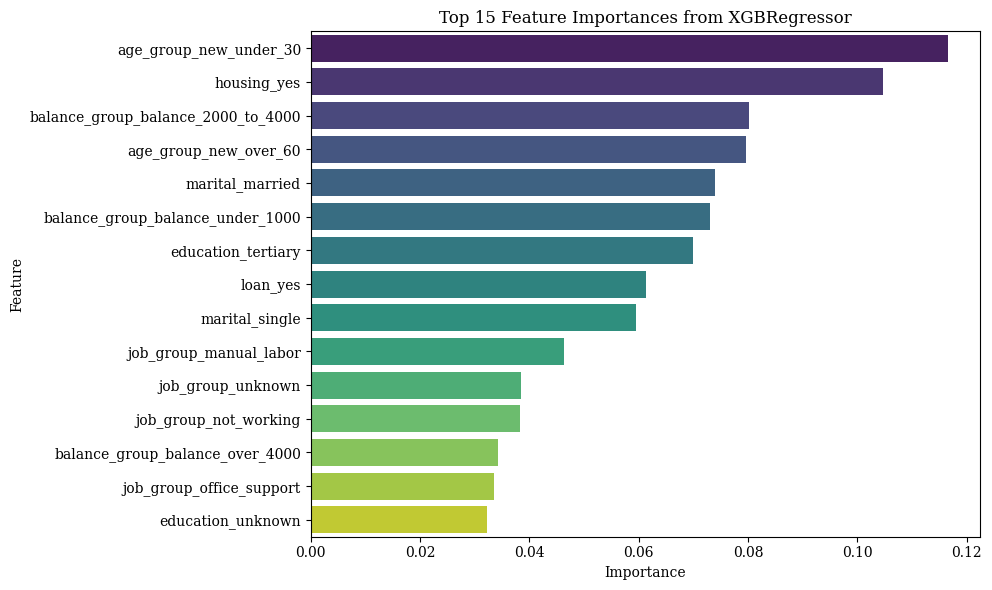

In [21]:
# Get feature importances from the trained XGBRegressor
importances = best_model.feature_importances_
feature_names = X_train_encoded.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [22]:
# Predict subscription probability for train and validation sets
X_train['subscription_proba'] = best_model.predict(X_train_encoded)
X_val['subscription_proba'] = best_model.predict(X_val_encoded)

# Create copies and add customer_id directly with proper mapping
X_train_with_id = X_train.copy()
X_val_with_id = X_val.copy()

# Map customer_id directly from background_df using the indices
X_train_with_id['customer_id'] = [background_df.iloc[idx]['customer_id'] for idx in bg_train_df.index]
X_val_with_id['customer_id'] = [background_df.iloc[idx]['customer_id'] for idx in bg_val_df.index]

# Concatenate train and validation predictions
subscription_proba_df = pd.concat([
    X_train_with_id[['customer_id', 'subscription_proba']],
    X_val_with_id[['customer_id', 'subscription_proba']]
], ignore_index=True)

print(subscription_proba_df.head())

# Check for duplicates before merging
print(f"Duplicates in subscription_proba_df: {subscription_proba_df.duplicated().sum()}")


   customer_id  subscription_proba
0        24340            0.116606
1        31298            0.272960
2        18443            0.043537
3         6754            0.048511
4        31925            0.052011
Duplicates in subscription_proba_df: 0


In [23]:
subscription_proba_df[subscription_proba_df.duplicated()==True]

,customer_id,subscription_proba


In [24]:
# Remove duplicates if any exist
subscription_proba_df = subscription_proba_df.drop_duplicates(subset='customer_id', keep='first')

# Merge with train_df
train_df = train_df.merge(subscription_proba_df, on='customer_id', how='left')
train_df.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,...,duration_category_short,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year,day_category_day_1_to_9,day_category_day_21_to_31,subscription_proba
0,14307,0,True,False,False,True,False,False,True,False,...,True,False,True,False,False,True,False,False,False,0.052157
1,17812,0,True,False,False,False,False,False,True,True,...,True,False,False,False,True,True,False,False,True,0.034385
2,11020,0,False,True,False,True,False,True,False,False,...,True,True,False,False,False,True,False,False,False,0.094287
3,15158,0,True,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,0.075779
4,24990,0,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,0.052157


In [25]:
# Drop columns from train_df whose names start with specified prefixes
drop_prefixes_new = ['marital', 'education', 'default', 'housing', 'loan', 'job', 'balance', 'age']
cols_to_drop_new = [col for col in train_df.columns if any(col.startswith(prefix) for prefix in drop_prefixes_new)]

train_df_reduced = train_df.drop(columns=cols_to_drop_new)
train_df_reduced.head()

,customer_id,y_encoded,contact_telephone,contact_unknown,duration_category_medium,duration_category_short,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year,day_category_day_1_to_9,day_category_day_21_to_31,subscription_proba
0,14307,0,False,False,False,True,False,True,False,False,True,False,False,False,0.052157
1,17812,0,False,False,False,True,False,False,False,True,True,False,False,True,0.034385
2,11020,0,False,True,False,True,True,False,False,False,True,False,False,False,0.094287
3,15158,0,False,False,False,False,True,False,False,False,True,False,False,False,0.075779
4,24990,0,False,False,False,True,False,False,False,False,False,False,False,False,0.052157


### Using recall

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
import numpy as np

# Prepare features and target
X_cls = train_df_reduced.drop(['customer_id', 'y_encoded'], axis=1)
y_cls = train_df_reduced['y_encoded']

# Split into train and validation sets
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Compute class weights
classes = np.unique(y_train_cls)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cls)
class_weight_dict = dict(zip(classes, class_weights))
sample_weights = y_train_cls.map(class_weight_dict)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=class_weights[1] / class_weights[0]
)

random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=100,
    scoring='recall',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls, y_train_cls, sample_weight=sample_weights)

print("Best parameters:", random_search.best_params_)
print("Best recall score (CV):", random_search.best_score_)

# Save the best model
import joblib
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_new.joblib')


# Evaluate on validation set
y_pred_val_cls = random_search.best_estimator_.predict(X_val_cls)
recall_val = recall_score(y_val_cls, y_pred_val_cls)
print(f"Validation recall: {recall_val:.4f}")

accuracy_val = accuracy_score(y_val_cls, y_pred_val_cls)
print(f"Validation accuracy: {accuracy_val:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best recall score (CV): 0.9886821435817176
Validation recall: 0.9914
Validation accuracy: 0.5089


C:\Users\schakr18\AppData\Local\Temp\ipykernel_30988\86352800.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


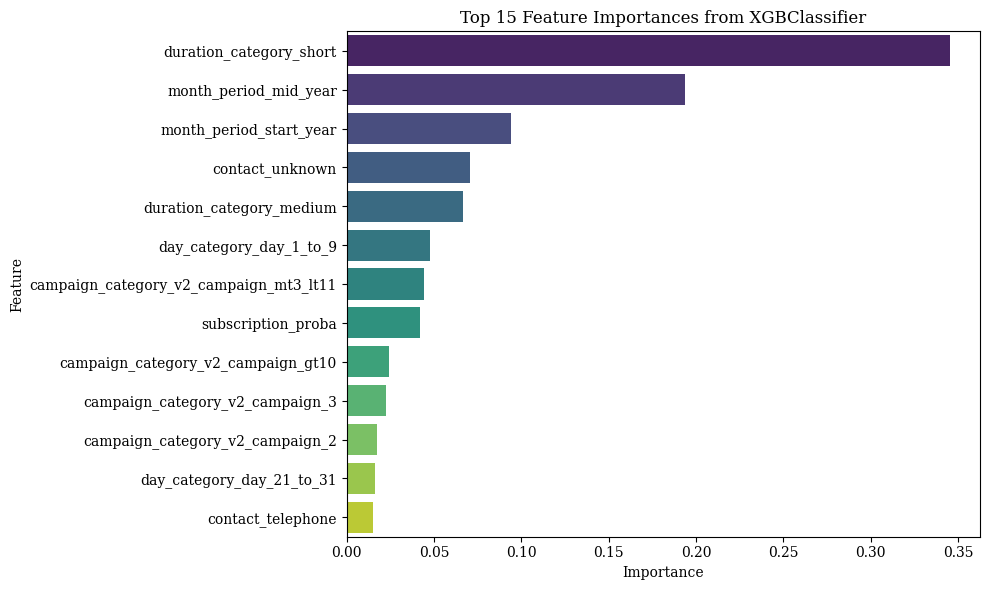

In [29]:
# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = random_search.best_estimator_.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Confusion Matrix:
[[2797 3139]
 [   4  460]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64      5936
           1       0.13      0.99      0.23       464

    accuracy                           0.51      6400
   macro avg       0.56      0.73      0.43      6400
weighted avg       0.94      0.51      0.61      6400



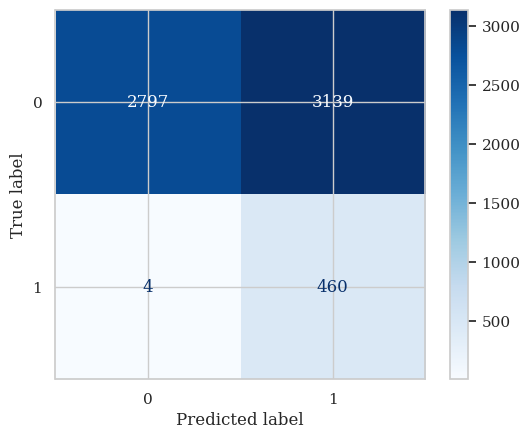

In [30]:
import joblib
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# Save the best model
# joblib.dump(random_search.best_estimator_, 'xgb_cls_best_model.joblib')

# Predict on validation set
y_pred_val_cls = random_search.best_estimator_.predict(X_val_cls)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

In [31]:
# Read the test data
test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBRegressor model
xgb_reg_loaded = joblib.load('xgb_reg_model.joblib')

# Prepare features for subscription probability prediction
reg_features = [
    'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown',
    'default_yes', 'housing_yes', 'loan_yes', 'age_group_new_over_60', 'age_group_new_under_30',
    'balance_group_balance_2000_to_4000', 'balance_group_balance_over_4000', 'balance_group_balance_under_1000',
    'job_group_manual_labor', 'job_group_not_working', 'job_group_office_support', 'job_group_unknown'
]

# Predict subscription probability
test_data['subscription_proba'] = xgb_reg_loaded.predict(test_data[reg_features])

# Prepare features for classification
cls_features = [
    'contact_telephone', 'contact_unknown', 'duration_category_medium', 'duration_category_short',
    'campaign_category_v2_campaign_2', 'campaign_category_v2_campaign_3', 'campaign_category_v2_campaign_gt10',
    'campaign_category_v2_campaign_mt3_lt11', 'month_period_mid_year', 'month_period_start_year',
    'day_category_day_1_to_9', 'day_category_day_21_to_31', 'subscription_proba'
]

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_new.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(test_data[cls_features])

# Show the first few predictions
test_data[['customer_id', 'y_pred', 'subscription_proba']].head()

,customer_id,y_pred,subscription_proba
0,32823,1,0.070819
1,16298,1,0.090023
2,28505,1,0.128688
3,6689,0,0.048511
4,26893,1,0.073768


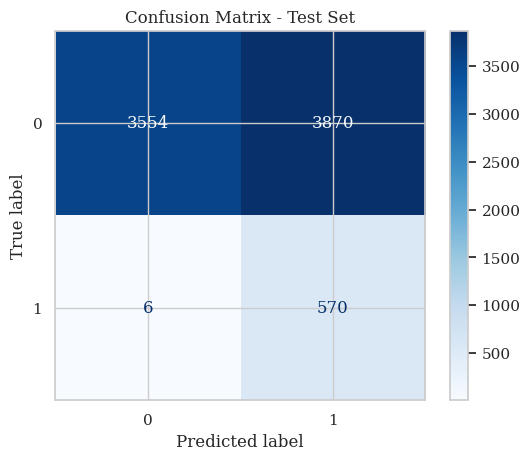

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      7424
           1       0.13      0.99      0.23       576

    accuracy                           0.52      8000
   macro avg       0.56      0.73      0.44      8000
weighted avg       0.94      0.52      0.62      8000



In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

### Using accuracy

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best recall score (CV): 0.8702734375000001
Validation recall: 0.4332
Validation accuracy: 0.8614


C:\Users\schakr18\AppData\Local\Temp\ipykernel_30988\4083183042.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


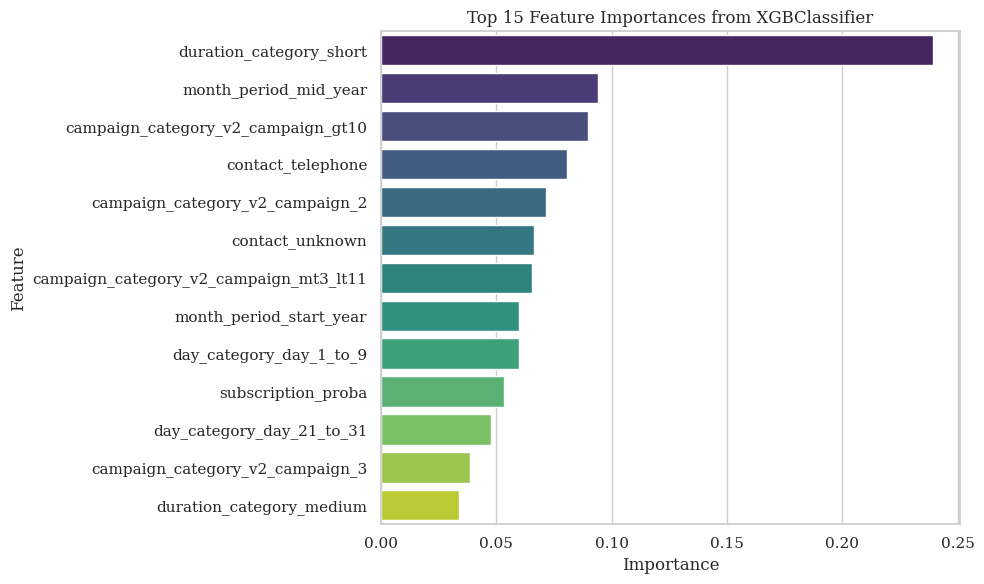

Confusion Matrix:
[[5312  624]
 [ 263  201]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5936
           1       0.24      0.43      0.31       464

    accuracy                           0.86      6400
   macro avg       0.60      0.66      0.62      6400
weighted avg       0.90      0.86      0.88      6400



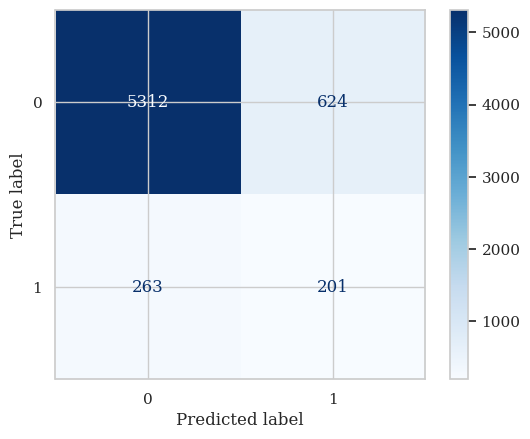

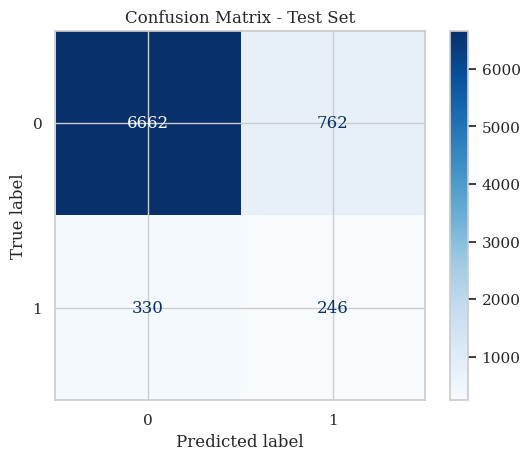

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7424
           1       0.24      0.43      0.31       576

    accuracy                           0.86      8000
   macro avg       0.60      0.66      0.62      8000
weighted avg       0.90      0.86      0.88      8000



In [34]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
import numpy as np

# Prepare features and target
X_cls = train_df_reduced.drop(['customer_id', 'y_encoded'], axis=1)
y_cls = train_df_reduced['y_encoded']

# Split into train and validation sets
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Compute class weights
classes = np.unique(y_train_cls)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cls)
class_weight_dict = dict(zip(classes, class_weights))
sample_weights = y_train_cls.map(class_weight_dict)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=class_weights[1] / class_weights[0]
)

random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls, y_train_cls, sample_weight=sample_weights)

print("Best parameters:", random_search.best_params_)
print("Best recall score (CV):", random_search.best_score_)

# Save the best model
import joblib
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_new_accuracy.joblib')


# Evaluate on validation set
y_pred_val_cls = random_search.best_estimator_.predict(X_val_cls)
recall_val = recall_score(y_val_cls, y_pred_val_cls)
print(f"Validation recall: {recall_val:.4f}")

accuracy_val = accuracy_score(y_val_cls, y_pred_val_cls)
print(f"Validation accuracy: {accuracy_val:.4f}")


# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = random_search.best_estimator_.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# Save the best model
# joblib.dump(random_search.best_estimator_, 'xgb_cls_best_model.joblib')

# Predict on validation set
y_pred_val_cls = random_search.best_estimator_.predict(X_val_cls)

import joblib
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

# Read the test data
test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBRegressor model
xgb_reg_loaded = joblib.load('xgb_reg_model.joblib')

# Prepare features for subscription probability prediction
reg_features = [
    'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown',
    'default_yes', 'housing_yes', 'loan_yes', 'age_group_new_over_60', 'age_group_new_under_30',
    'balance_group_balance_2000_to_4000', 'balance_group_balance_over_4000', 'balance_group_balance_under_1000',
    'job_group_manual_labor', 'job_group_not_working', 'job_group_office_support', 'job_group_unknown'
]

# Predict subscription probability
test_data['subscription_proba'] = xgb_reg_loaded.predict(test_data[reg_features])

# Prepare features for classification
cls_features = [
    'contact_telephone', 'contact_unknown', 'duration_category_medium', 'duration_category_short',
    'campaign_category_v2_campaign_2', 'campaign_category_v2_campaign_3', 'campaign_category_v2_campaign_gt10',
    'campaign_category_v2_campaign_mt3_lt11', 'month_period_mid_year', 'month_period_start_year',
    'day_category_day_1_to_9', 'day_category_day_21_to_31', 'subscription_proba'
]

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_new_accuracy.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(test_data[cls_features])

# Show the first few predictions
test_data[['customer_id', 'y_pred', 'subscription_proba']].head()

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)


### Using AOC

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters (AUC): {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best AUC score (CV): 0.904260240798814
Validation AUC: 0.9117
Recall score: 0.4332
Accuracy score: 0.8614


C:\Users\schakr18\AppData\Local\Temp\ipykernel_30988\2980504852.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


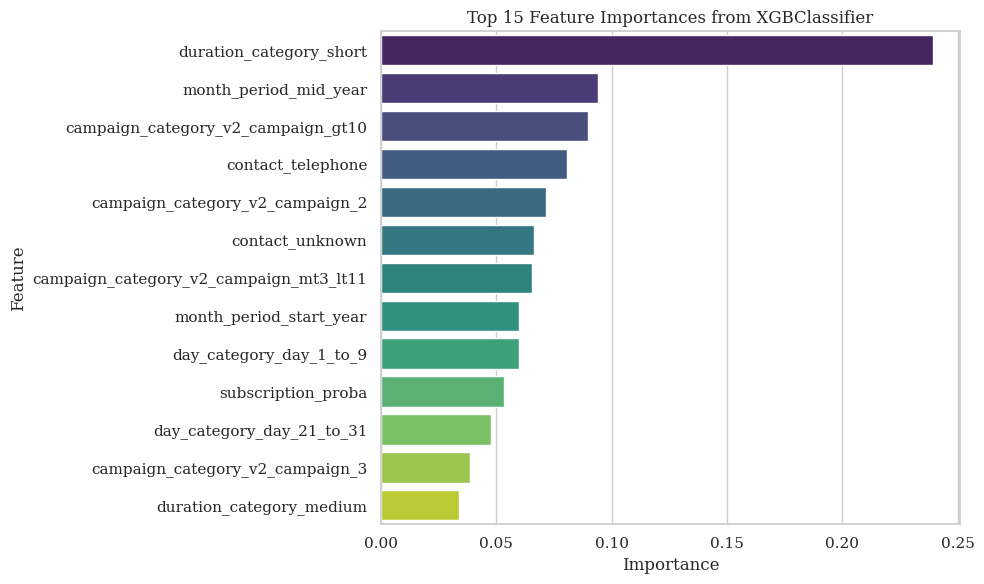

Confusion Matrix:
[[5312  624]
 [ 263  201]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5936
           1       0.24      0.43      0.31       464

    accuracy                           0.86      6400
   macro avg       0.60      0.66      0.62      6400
weighted avg       0.90      0.86      0.88      6400



FileNotFoundError: [Errno 2] No such file or directory: 'xgb_cls_model_best_model_auc.joblib'

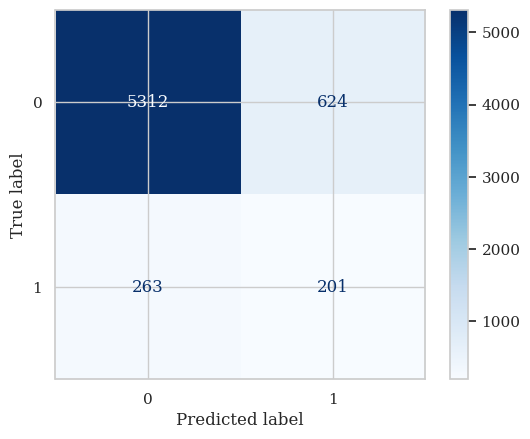

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score

# Define parameter grid for RandomizedSearchCV
param_dist_auc = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls_auc = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=class_weights[1] / class_weights[0],
    eval_metric='auc'
)

random_search_auc = RandomizedSearchCV(
    estimator=xgb_cls_auc,
    param_distributions=param_dist_auc,
    n_iter=40,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_auc.fit(X_train_cls, y_train_cls, sample_weight=sample_weights)

print("Best parameters (AUC):", random_search_auc.best_params_)
print("Best AUC score (CV):", random_search_auc.best_score_)

# Evaluate on validation set
y_pred_val_proba = random_search_auc.best_estimator_.predict_proba(X_val_cls)[:, 1]
auc_val = roc_auc_score(y_val_cls, y_pred_val_proba)
print(f"Validation AUC: {auc_val:.4f}")

print(f"Recall score: {recall_score(y_val_cls, y_pred_val_cls):.4f}")
print(f"Accuracy score: {accuracy_score(y_val_cls, y_pred_val_cls):.4f}")

# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = random_search.best_estimator_.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# Save the best model
joblib.dump(random_search.best_estimator_, 'xgb_cls_best_model_auc.joblib')

# Predict on validation set
y_pred_val_cls = random_search.best_estimator_.predict(X_val_cls)

import joblib
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

# Read the test data
test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBRegressor model
xgb_reg_loaded = joblib.load('xgb_reg_model.joblib')

# Prepare features for subscription probability prediction
reg_features = [
    'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown',
    'default_yes', 'housing_yes', 'loan_yes', 'age_group_new_over_60', 'age_group_new_under_30',
    'balance_group_balance_2000_to_4000', 'balance_group_balance_over_4000', 'balance_group_balance_under_1000',
    'job_group_manual_labor', 'job_group_not_working', 'job_group_office_support', 'job_group_unknown'
]

# Predict subscription probability
test_data['subscription_proba'] = xgb_reg_loaded.predict(test_data[reg_features])

# Prepare features for classification
cls_features = [
    'contact_telephone', 'contact_unknown', 'duration_category_medium', 'duration_category_short',
    'campaign_category_v2_campaign_2', 'campaign_category_v2_campaign_3', 'campaign_category_v2_campaign_gt10',
    'campaign_category_v2_campaign_mt3_lt11', 'month_period_mid_year', 'month_period_start_year',
    'day_category_day_1_to_9', 'day_category_day_21_to_31', 'subscription_proba'
]




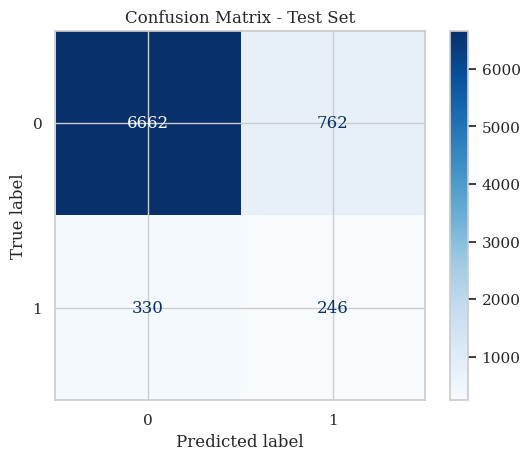

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7424
           1       0.24      0.43      0.31       576

    accuracy                           0.86      8000
   macro avg       0.60      0.66      0.62      8000
weighted avg       0.90      0.86      0.88      8000



In [36]:
# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_best_model_auc.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(test_data[cls_features])

# Show the first few predictions
test_data[['customer_id', 'y_pred', 'subscription_proba']].head()

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

In [37]:
# %pip install --user imblearn

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters (oversampled): {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best recall score (CV, oversampled): 0.9906502996329827


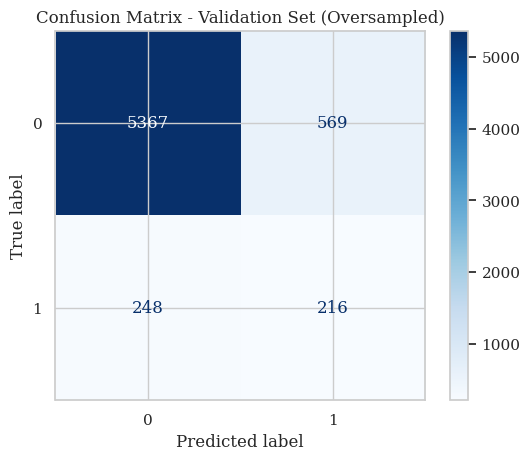

Classification Report - Validation Set (Oversampled):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5936
           1       0.28      0.47      0.35       464

    accuracy                           0.87      6400
   macro avg       0.62      0.68      0.64      6400
weighted avg       0.91      0.87      0.89      6400



In [38]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Random oversampling to balance the classes
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_cls, y_train_cls)

# Redefine the classifier (no need for scale_pos_weight after balancing)
xgb_cls_ros = XGBClassifier(
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV with recall as the scoring metric
random_search_ros = RandomizedSearchCV(
    estimator=xgb_cls_ros,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_ros.fit(X_train_ros, y_train_ros)

print("Best parameters (oversampled):", random_search_ros.best_params_)
print("Best recall score (CV, oversampled):", random_search_ros.best_score_)

# Evaluate on validation set
y_pred_val_ros = random_search_ros.best_estimator_.predict(X_val_cls)

# Confusion matrix
cm_ros = confusion_matrix(y_val_cls, y_pred_val_ros)
disp_ros = ConfusionMatrixDisplay(confusion_matrix=cm_ros, display_labels=[0, 1])
disp_ros.plot(cmap='Blues')
plt.title("Confusion Matrix - Validation Set (Oversampled)")
plt.show()

# Classification report
report_ros = classification_report(y_val_cls, y_pred_val_ros)
print("Classification Report - Validation Set (Oversampled):")
print(report_ros)